In [1]:
import os
import pandas as pd

#data path 수정
os.chdir("C:\\Users\\User\\Desktop\\G팔로미1\\G-팔로미 data")
os.getcwd()

'C:\\Users\\User\\Desktop\\G팔로미1\\G-팔로미 data'

In [99]:
# Setting base path
#ROOT_PATH = os.path.join(os.getcwd(), 'Dataset_csv')
#CBISDDSM_csvPATH = os.path.join('CBISDDSM')
#MIAS_PATH = os.path.join(ROOT_PATH, 'MIAS')

# Load Dataframe from .csv
calc_case_description_train_set_df = pd.read_csv(("calc_case_description_train_set.csv"), index_col=0)
calc_case_description_test_set_df = pd.read_csv(("calc_case_description_test_set.csv"), index_col=0)
mass_case_description_train_set_df = pd.read_csv(("mass_case_description_train_set2.csv"), index_col=0)
mass_case_description_test_set_df = pd.read_csv(("mass_case_description_test_set.csv"), index_col=0)

In [100]:
mass_case_description_train_set_df.head(3)

,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
patient_id,,,,,,,,,,,,,
P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...


In [101]:
#테스트 및 데이터 타입 조사
#print(mass_case_description_train_set_df['subtlety'].unique())
#print(mass_case_description_train_set_df['abnormality id']['P_00001'])
print(mass_case_description_test_set_df['pathology'].unique())

['MALIGNANT' 'BENIGN' 'BENIGN_WITHOUT_CALLBACK']


In [102]:
#데이터 양 확인
print('Length of calc_case_description_train_set_df: ', len(calc_case_description_train_set_df))
print('Length of calc_case_description_test_set_df', len(calc_case_description_test_set_df))
print('Length of mass_case_description_train_set_df: ', len(mass_case_description_train_set_df))
print('Length of mass_case_description_test_set_df:', len(mass_case_description_test_set_df))

Length of calc_case_description_train_set_df:  1546
Length of calc_case_description_test_set_df 326
Length of mass_case_description_train_set_df:  1318
Length of mass_case_description_test_set_df: 378


In [103]:
mass_case_description_train_set_df['pathology']

patient_id
P_00001    MALIGNANT
P_00001    MALIGNANT
P_00004       BENIGN
P_00004       BENIGN
P_00004       BENIGN
             ...    
P_02033    MALIGNANT
P_02079    MALIGNANT
P_02079    MALIGNANT
P_02092    MALIGNANT
P_02092    MALIGNANT
Name: pathology, Length: 1318, dtype: object

In [104]:
mass=mass_case_description_train_set_df

#pathology를 기준으로 데이터 구별
mal_patient = mass.loc[(mass['pathology'].str.contains('MALIGNANT'))]
benign_patient = mass.loc[(mass['pathology'].str.contains('BENIGN'))]
callback_patient = mass.loc[(mass['pathology'].str.contains('CALLBACK'))]

In [105]:
#pathology별 image path 지정
mal_patient_ROIimage = mal_patient['cropped image file path'].to_list()
benign_patient_ROIimage = benign_patient['cropped image file path'].to_list()
callback_patient_ROIimage = callback_patient['cropped image file path'].to_list()

In [106]:
#구체적인 image 경로 지정

DDSM_dataPATH = './CBIS-DDSM'
malignant = []
benign = []
callback = []

for i in range(len(mal_patient_ROIimage)):
    malignant.append(os.path.join(DDSM_dataPATH, mal_patient_ROIimage[i]).replace('\n', '').replace('\r', ''))
    
for i in range(len(benign_patient_ROIimage)):
    benign.append(os.path.join(DDSM_dataPATH, benign_patient_ROIimage[i]).replace('\n', '').replace('\r', ''))
    
for i in range(len(callback_patient_ROIimage)):
    callback.append(os.path.join(DDSM_dataPATH, callback_patient_ROIimage[i]).replace('\n', '').replace('\r', ''))

In [110]:
#CBIS-DDSM 데이터를 각 class별로 분류
"""import shutil

def ChangeName(path,pathology):
    for i in range(len(path)):
        os.rename(path[i],'./train/'+str(pathology)+'/train'+str(i)+'.dcm')
        
ChangeName(malignant,'MALIGNANT')
ChangeName(benign,'BENIGN')
ChangeName(callback,'BENIGN_WITHOUT_CALLBACK')"""

"import shutil\n\ndef ChangeName(path,pathology):\n    for i in range(len(path)):\n        os.rename(path[i],'./train/'+str(pathology)+'/train'+str(i)+'.dcm')\n        \nChangeName(callback,'BENIGN_WITHOUT_CALLBACK')"

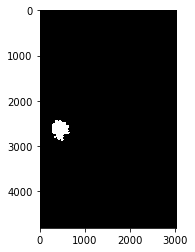

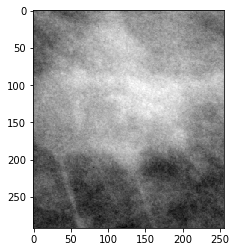

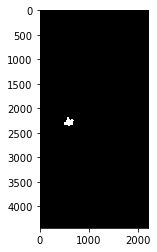

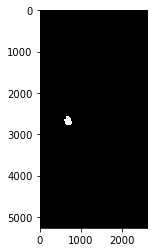

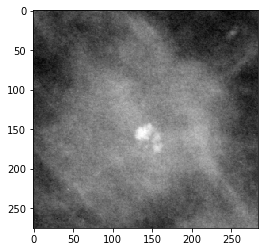

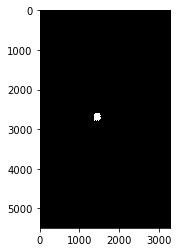

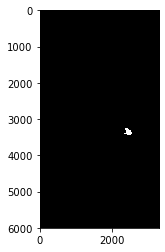

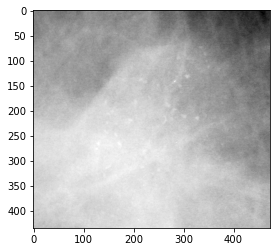

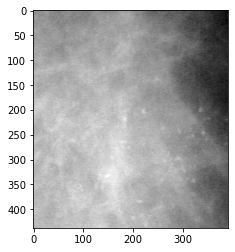

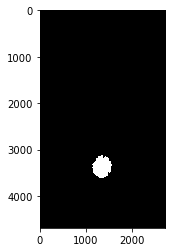

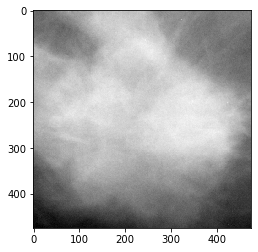

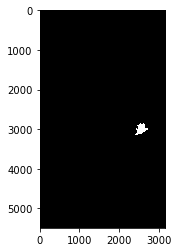

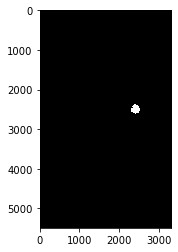

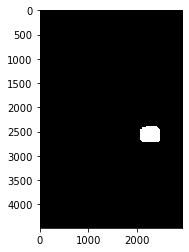

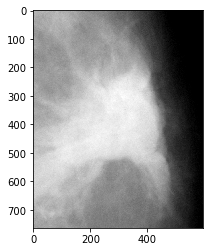

In [111]:
import PIL
import numpy as np
import pydicom as dicom
from PIL import ImageDraw
import matplotlib.pyplot as plt
import cv2

for i in range(15):
    sample = dicom.dcmread('./train/MALIGNANT/train'+str(i)+'.dcm')
    sample=sample.pixel_array
#sample = cv2.resize(sample.pixel_array, dsize=(1000, 1000), interpolation=cv2.INTER_CUBIC)

    plt.imshow(sample, cmap='gray')
    plt.show()